In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [2]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
cars = pd.read_csv('../chap2/data/car_evaluation.csv', names=cols, header=None)


<AxesSubplot:ylabel='output'>

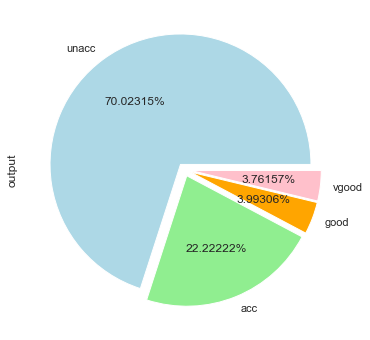

In [3]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', 
                                colors=['lightblue', 'lightgreen', 'orange', 'pink'], 
                                explode=(0.05, 0.05, 0.05,0.05))

In [4]:
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1)
y = labels.values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense (Dense)                (None, 15)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
139/139 [==============================] - 0s 2ms/step - loss: 1.3284 - acc: 0.4670 - val_loss: 1.1004 - val_acc: 0.6570
Epoch 2/50
139/139 [==============================] - 0s 1ms/step - loss: 0.7858 - acc: 0.7276 - val_loss: 0.7317 - val_acc: 0.6859
Epoch 3/50
139/139 [==============================] - 0s 1ms/step - loss: 0.5226 - acc: 0.7846 - val_loss: 0.5473 - val_acc: 0.7726
Epoch 4/50
139/139 [==============================] - 0s 1ms/step - loss: 0.3920 - acc: 0.8480 - val_loss: 0.4444 - val_acc: 0.8448
Epoch 5/50
139/139 [==============================] - 0s 1ms/step - loss: 0.3293 - acc: 0.8751 - val_loss: 0.4049 - val_acc: 0.8159
Epoch 6/50
139/139 [==============================] - 0s 1ms/step - loss: 0.2879 - acc: 0.8851 - val_loss: 0.3522 - val_acc: 0.8664
Epoch 7/50
139/139 [==============================] - 0s 1ms/step - loss: 0.2593 - acc: 0.8941 - val_loss: 0.3198 - val_acc: 0.8736
Epoch 8/50
139/139 [==============================] - 0s 1ms/step - loss: 0.

In [8]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 [==============================] - 0s 1ms/step - loss: 0.0762 - acc: 0.9798
Test Score: 0.0762329176068306
Test Accuracy: 0.9797688126564026
